# Probability Exercise

## Probability Exercise: How to increase our good trade from 50% to 70%?

Goals of this chapter:

- Compute and understand Random Variable
- Compute and understand Intersection, Union and Independency
- Compute and understand Conditional Probability

In [124]:
import yfinance as yf
import ta # library to create technical indicators
import numpy as np
import pandas as pd
# scipy==1.7.1 in video
import warnings
warnings.filterwarnings("ignore")

In [125]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

In [126]:
# import the data and create variations of google
df = yf.download("GOOG")[["Adj Close"]].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019
...,...
2024-09-10,0.003143
2024-09-11,0.014266
2024-09-12,0.022281


### Compute Basic Propability

In [127]:
# we have a random variable that is the google return and we want to unerstand the rules that this random variable follows
# only two cases: the return will be positive or the return will be negative
# compute the chance of an increase
# we'll extract all the positive returns, compute the number of positive returns and devide by the number of returns
# (1) extracting all the positive returns
positive_returns = len(df[df["Adj Close"]>0]) # 2659 out of 5051 are positive
positive_returns

2660

In [128]:
# calculating the percentage of increase
p_increase = positive_returns / len(df) * 100
p_increase

52.65241488519399

In [129]:
# compute the chance of a decrease
p_decrease = len(df[df["Adj Close"]<0]) / len(df) * 100
p_decrease

47.327790973871736

In [130]:
# %Increase + %Decrease close to one but not mandatory 1
print(f"Weights | \t Increase: {"%2.f" % p_increase} \t Decrease: {"%2.f" % p_decrease}")
# output: Weights | 	 Increase: 53 	 Decrease: 47
# we have more changes of having an increase than a decrease
# small difference, not good to use as basis for a trading strategy

Weights | 	 Increase: 53 	 Decrease: 47


### Computing Conditional Probability - Creating Bollinger Bands

Goal of this excercise: computing the probability of increase knowing that a technical indicator tells us to buy this stock.

In [131]:
# bollinger band class
from ta.volatility import BollingerBands

**Bollinger Bands** are used as an example here but you have to use a stronger strategy if you want to invest on it.

- Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price. Bollinger Bands use 2 parameters, Period and Standard Deviations, StdDev ([fidelity.com](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands)).

In [132]:
# Import close price
df = yf.download("EURUSD=X")[["Adj Close"]]
# create the returns
df["return"] = df["Adj Close"].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,return
Date,,
2003-12-01,1.196501,NaN
2003-12-02,1.208897,0.010360
2003-12-03,1.212298,0.002813
2003-12-04,1.208094,-0.003467
2003-12-05,1.218695,0.008775
...,...,...
2024-09-11,1.102098,-0.001499
2024-09-12,1.101091,-0.000914
2024-09-13,1.107788,0.006082


In [133]:
# initialize Bollinger Bands class
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)
indicator_bb

In [134]:
# add Bollinger Bands features
# lower band
df["bb_bbl"] = indicator_bb.bollinger_lband()
# upper band
df["bb_bbh"] = indicator_bb.bollinger_hband()

In [135]:
df

,Adj Close,return,bb_bbl,bb_bbh
Date,,,,
2003-12-01,1.196501,NaN,NaN,NaN
2003-12-02,1.208897,0.010360,NaN,NaN
2003-12-03,1.212298,0.002813,NaN,NaN
2003-12-04,1.208094,-0.003467,NaN,NaN
2003-12-05,1.218695,0.008775,NaN,NaN
...,...,...,...,...
2024-09-11,1.102098,-0.001499,1.100004,1.117319
2024-09-12,1.101091,-0.000914,1.099970,1.117330
2024-09-13,1.107788,0.006082,1.101414,1.116937


<Axes: xlabel='Date'>

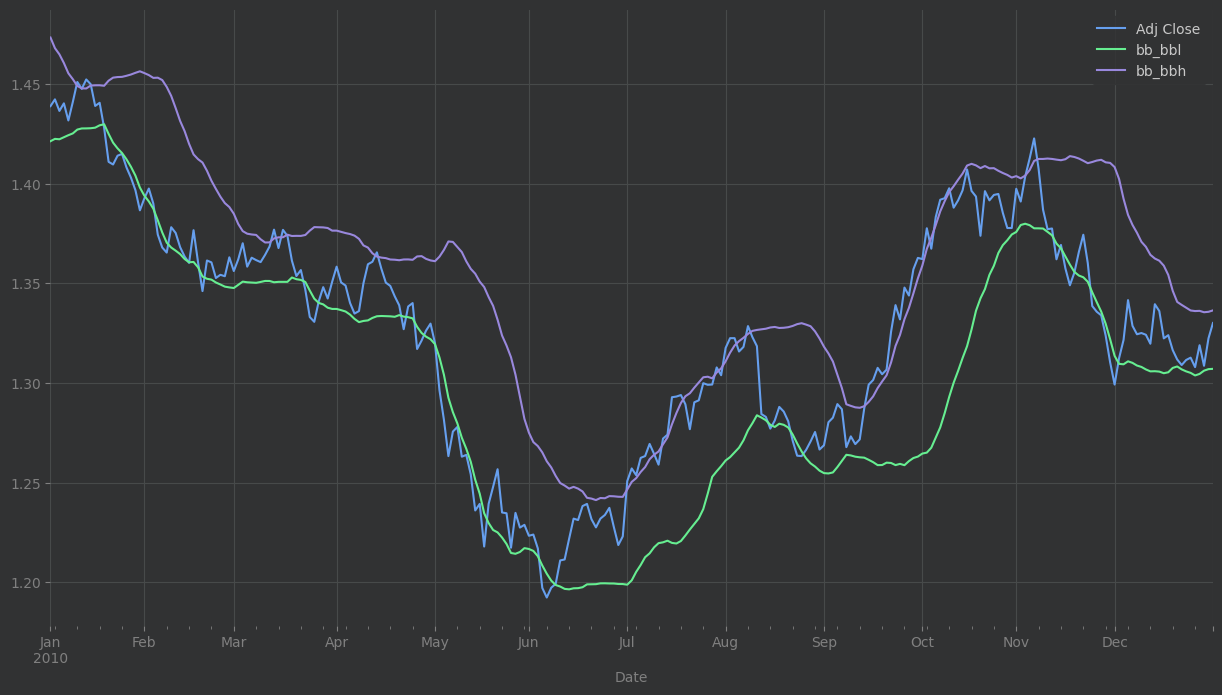

In [136]:
# plotting the data from one year using pandas
df[["Adj Close", "bb_bbl", "bb_bbh"]].loc["2010"].plot(figsize=(15,8))

### Computing Conditional Probability for Bollinger Bands Strategy

In [137]:
# Import close price
df = yf.download("ETH-USD")[["Adj Close"]]
# create the returns
df["return"] = df["Adj Close"].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,return
Date,,
2017-11-09,320.884003,NaN
2017-11-10,299.252991,-0.067411
2017-11-11,314.681000,0.051555
2017-11-12,307.907990,-0.021523
2017-11-13,316.716003,0.028606
...,...,...
2024-09-13,2441.607178,0.033799
2024-09-14,2418.595703,-0.009425
2024-09-15,2320.897217,-0.040395


In [138]:
# initialize Bollinger Bands class
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)
indicator_bb

In [139]:
# add Bollinger Bands features
# moving average
df["bb_bbm"] = indicator_bb.bollinger_mavg()
# lower band
df["bb_bbl"] = indicator_bb.bollinger_lband()
# upper band
df["bb_bbh"] = indicator_bb.bollinger_hband()
df

,Adj Close,return,bb_bbm,bb_bbl,bb_bbh
Date,,,,,
2017-11-09,320.884003,NaN,NaN,NaN,NaN
2017-11-10,299.252991,-0.067411,NaN,NaN,NaN
2017-11-11,314.681000,0.051555,NaN,NaN,NaN
2017-11-12,307.907990,-0.021523,NaN,NaN,NaN
2017-11-13,316.716003,0.028606,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-13,2441.607178,0.033799,2443.781360,2254.715157,2632.847563
2024-09-14,2418.595703,-0.009425,2427.253259,2270.054076,2584.452442
2024-09-15,2320.897217,-0.040395,2409.231091,2275.103162,2543.359020


In [140]:
# the strategy will be to understand the behavior of the adjusted close price 
# knowing that yesterday the price was below the upper bollinger band and today is above
# goal: finding out when to sell
# to achieve this we need to shift some values by
# (1) creating two new columns: yesterday adjusted close and yesterday bollinger band (upper)
df["Adj Close Yesterday"] = df["Adj Close"].shift(1)
df["bbh_yesterday"] = df["bb_bbh"].shift(1)
#drop the rows containing missing values
df.dropna()
df

,Adj Close,return,bb_bbm,bb_bbl,bb_bbh,Adj Close Yesterday,bbh_yesterday
Date,,,,,,,
2017-11-09,320.884003,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,299.252991,-0.067411,NaN,NaN,NaN,320.884003,NaN
2017-11-11,314.681000,0.051555,NaN,NaN,NaN,299.252991,NaN
2017-11-12,307.907990,-0.021523,NaN,NaN,NaN,314.681000,NaN
2017-11-13,316.716003,0.028606,NaN,NaN,NaN,307.907990,NaN
...,...,...,...,...,...,...,...
2024-09-13,2441.607178,0.033799,2443.781360,2254.715157,2632.847563,2361.781738,2677.123185
2024-09-14,2418.595703,-0.009425,2427.253259,2270.054076,2584.452442,2441.607178,2632.847563
2024-09-15,2320.897217,-0.040395,2409.231091,2275.103162,2543.359020,2418.595703,2584.452442


In [141]:
# variable initialization
# n -> we need to compute the number of days from the signal to the day 1, signal to day 2, etc. (so far: ???)
n = 10
# everytime we have a signal we put the date in the list of days
dates = []
# list to keep the return of the n day after the signal
returns = []

In [142]:
# for loop that runs from zero to the length of the dataframe minus n minus 1
for i in range(len(df) - n - 1):
    # extracting the row each time
    row = df.iloc[i:i+1,:]
    # create signal condition
    if (row["Adj Close Yesterday"].values[0] < row["bbh_yesterday"].values[0]) and (row["Adj Close"].values[0] > row["bb_bbh"].values[0]):
        # save the date
        dates.append(row.index[0])
        # compute the returns from the signal to 10 days later
        ret = [] # return from signal to end date for 1 signal
        # now we need another loop
        for day in range (1,n):
            ret.append(df.iloc[i+day: i+1+day,:]["return"].values[0])
        # putting it into our list of returns
        returns.append(ret)

# creating a dataframe with returns with cumulative sum
df_returns = pd.DataFrame(returns).cumsum(axis=1)
df_returns

,0,1,2,3,4,5,6,7,8
0,0.264581,0.343386,0.333495,0.317157,0.334340,0.368477,0.472189,0.512682,0.503325
1,0.088503,0.107410,0.124535,0.168595,0.275624,0.271600,0.403256,0.369464,0.289126
2,0.096780,0.075547,0.020783,-0.163617,-0.201048,-0.179327,-0.176606,-0.064923,-0.156313
3,0.017744,0.078014,0.039355,0.023209,0.066747,0.148875,0.233098,0.216332,0.243529
4,0.082128,0.166351,0.149585,0.176782,0.210050,0.312159,0.181197,0.258206,0.234403
...,...,...,...,...,...,...,...,...,...
107,0.021299,0.041911,0.085426,0.072493,0.100362,0.096576,0.116723,0.156666,0.135878
108,-0.021191,-0.014613,-0.045392,-0.083485,-0.140338,-0.106402,-0.140563,-0.242999,-0.130327
109,-0.051452,-0.040447,-0.051308,-0.126114,-0.199543,-0.148946,-0.166476,-0.171854,-0.204332
110,0.034242,0.020494,0.031119,0.017883,0.023867,0.044314,0.061594,0.048297,0.028231


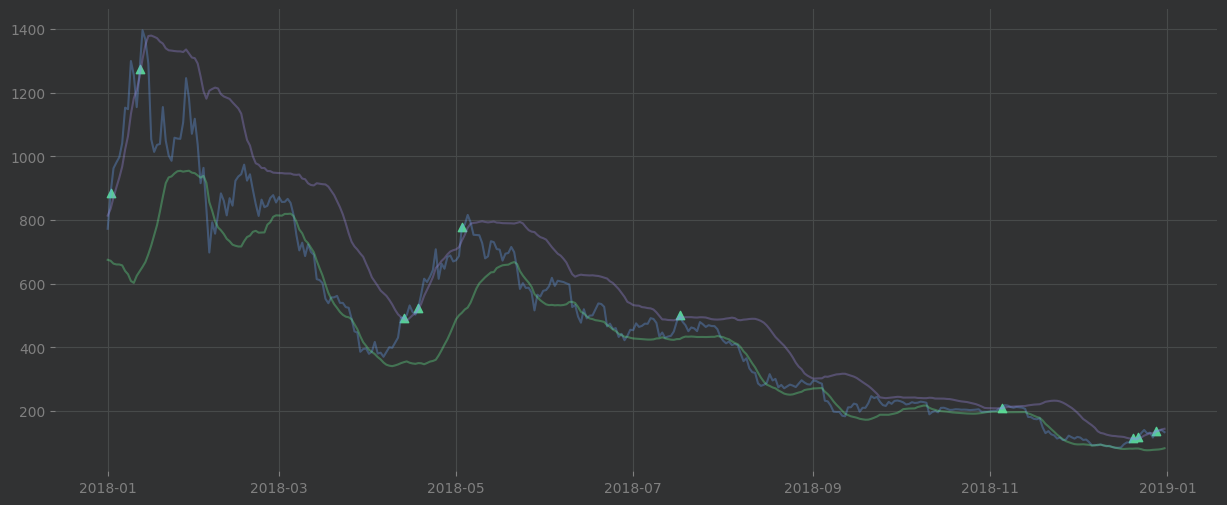

In [144]:
# we plot all the signl to be sure that our previous computations are correct
# select all signal in a index list to plot only this points
idx = dates
year="2018"

# adapt the size of the graph
plt.figure(figsize=(15,6))

# plot the points of the open long signal in green and the points of the close long signal in blue
plt.scatter(df.loc[idx].loc[year].index, df.loc[idx]["Adj Close"].loc[year], color= "#57CE95", marker="^")

# plot the rsi to be sure that the conditions are completed
plt.plot(df["Adj Close"].loc[year].index, df["Adj Close"].loc[year], alpha=0.35)
plt.plot(df["bb_bbl"].loc[year].index, df["bb_bbl"].loc[year], alpha=0.35)
plt.plot(df["bb_bbh"].loc[year].index, df["bb_bbh"].loc[year], alpha=0.35)

plt.show()